In [12]:
hidden_size = 25
epoch = 25
batch_size = 10

Epoch 1/25, Loss: 27.973084434827168
Epoch 2/25, Loss: 19.34603822509448
Epoch 3/25, Loss: 15.562737620989482
Epoch 4/25, Loss: 13.096238508621852
Epoch 5/25, Loss: 11.35041489636898
Epoch 6/25, Loss: 10.032287070314089
Epoch 7/25, Loss: 9.00525376212597
Epoch 8/25, Loss: 8.186710094889005
Epoch 9/25, Loss: 7.520113601048787
Epoch 10/25, Loss: 6.966536999046802
Epoch 11/25, Loss: 6.502819973667463
Epoch 12/25, Loss: 6.109201129515966
Epoch 13/25, Loss: 5.7716572075088814
Epoch 14/25, Loss: 5.480393233398597
Epoch 15/25, Loss: 5.2283609259327255
Epoch 16/25, Loss: 5.007367043157418
Epoch 17/25, Loss: 4.812156934320926
Epoch 18/25, Loss: 4.639280750314395
Epoch 19/25, Loss: 4.487708717286587
Epoch 20/25, Loss: 4.350160832087199
Epoch 21/25, Loss: 4.228906545877456
Epoch 22/25, Loss: 4.117896186033884
Epoch 23/25, Loss: 4.018991444051266
Epoch 24/25, Loss: 3.929022729019324
Epoch 25/25, Loss: 3.847991038064162


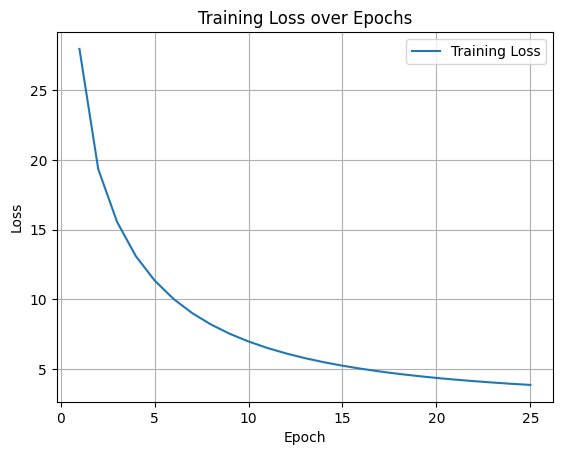

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 784  # MNIST images are 28x28 pixels
hidden_size = 25
output_size = 10
epochs = 25
batch_size = 10
learning_rate = 1e-6

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize weights and biases
weights_input_hidden = torch.randn(input_size, hidden_size, device=device, requires_grad=False)
biases_input_hidden = torch.randn(hidden_size, device=device, requires_grad=False)
weights_hidden_output = torch.randn(hidden_size, output_size, device=device, requires_grad=False)
biases_hidden_output = torch.randn(output_size, device=device, requires_grad=False)

# Lists to store loss values for each epoch
losses = []

# Training loop
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Move data to device
        data = data.view(-1, input_size).to(device)
        targets = targets.to(device)

        # Forward pass
        hidden_layer_input = torch.matmul(data, weights_input_hidden) + biases_input_hidden
        hidden_layer_output = torch.relu(hidden_layer_input)
        output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output

        # Calculate loss (CrossEntropy)
        loss = torch.nn.functional.cross_entropy(output, targets)

        # Backward pass (manually compute gradients)
        grad_output = (output - targets.view(-1, 1)) / output.size(0)
        grad_hidden_output = torch.matmul(hidden_layer_output.T, grad_output)
        grad_hidden_input = torch.matmul(grad_output, weights_hidden_output.T)
        grad_hidden_input[hidden_layer_input <= 0] = 0  # ReLU derivative
        grad_weights_input_hidden = torch.matmul(data.T, grad_hidden_input)
        grad_biases_input_hidden = grad_hidden_input.sum(dim=0)

        # Update weights and biases using SGD
        with torch.no_grad():
            weights_input_hidden -= learning_rate * grad_weights_input_hidden
            biases_input_hidden -= learning_rate * grad_biases_input_hidden
            weights_hidden_output -= learning_rate * grad_hidden_output
            biases_hidden_output -= learning_rate * grad_output.sum(dim=0)

        epoch_loss += loss.item()

    # Calculate average loss for the epoch
    epoch_loss /= len(train_loader)
    losses.append(epoch_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}')

# Plotting the training loss
plt.plot(range(1, epochs+1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
Hidden_size = 100
epochs = [25,50,100,150]

Epoch [1/150], Loss: 55.9018
Epoch [2/150], Loss: 38.3754
Epoch [3/150], Loss: 31.5571
Epoch [4/150], Loss: 27.4758
Epoch [5/150], Loss: 24.5994
Epoch [6/150], Loss: 22.4184
Epoch [7/150], Loss: 20.6392
Epoch [8/150], Loss: 19.1717
Epoch [9/150], Loss: 17.9127
Epoch [10/150], Loss: 16.8249
Epoch [11/150], Loss: 15.8637
Epoch [12/150], Loss: 15.0108
Epoch [13/150], Loss: 14.2538
Epoch [14/150], Loss: 13.5657
Epoch [15/150], Loss: 12.9337
Epoch [16/150], Loss: 12.3678
Epoch [17/150], Loss: 11.8435
Epoch [18/150], Loss: 11.3621
Epoch [19/150], Loss: 10.9170
Epoch [20/150], Loss: 10.5023
Epoch [21/150], Loss: 10.1220
Epoch [22/150], Loss: 9.7676
Epoch [23/150], Loss: 9.4343
Epoch [24/150], Loss: 9.1269
Epoch [25/150], Loss: 8.8340
Epoch [26/150], Loss: 8.5614
Epoch [27/150], Loss: 8.3042
Epoch [28/150], Loss: 8.0607
Epoch [29/150], Loss: 7.8362
Epoch [30/150], Loss: 7.6212
Epoch [31/150], Loss: 7.4181
Epoch [32/150], Loss: 7.2258
Epoch [33/150], Loss: 7.0424
Epoch [34/150], Loss: 6.8710
Ep

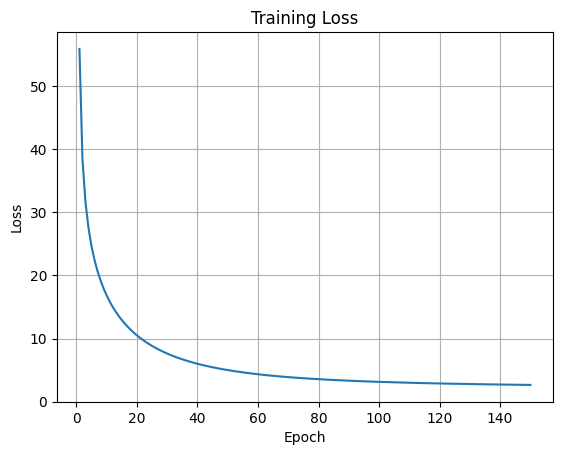

In [3]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 784  # MNIST images are 28x28 pixels
hidden_size = 100
output_size = 10
batch_size = 10
learning_rate = 1e-6
epochs = [25, 50, 100, 150]

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Model architecture
class FFNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize weights and biases manually
weights_input_hidden = torch.randn(input_size, hidden_size, device=device, requires_grad=False)
biases_input_hidden = torch.randn(hidden_size, device=device, requires_grad=False)
weights_hidden_output = torch.randn(hidden_size, output_size, device=device, requires_grad=False)
biases_hidden_output = torch.randn(output_size, device=device, requires_grad=False)

# Training without using optimizer
def train_without_optimizer(train_loader, weights_input_hidden, biases_input_hidden,
                            weights_hidden_output, biases_hidden_output, epochs):
    losses = []
    for epoch in range(max(epochs)):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            hidden_layer_input = torch.matmul(images, weights_input_hidden) + biases_input_hidden
            hidden_layer_output = torch.relu(hidden_layer_input)
            output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output
            loss = F.cross_entropy(output, labels)

            running_loss += loss.item()

            # Backward pass (manually compute gradients)
            grad_output = (output - torch.nn.functional.one_hot(labels, num_classes=output_size).float()).detach() / output.size(0)
            grad_hidden_output = torch.matmul(hidden_layer_output.T, grad_output)
            grad_hidden_input = torch.matmul(grad_output, weights_hidden_output.T)
            grad_hidden_input[hidden_layer_input <= 0] = 0  # ReLU derivative

            # Update weights and biases
            with torch.no_grad():
                weights_input_hidden -= learning_rate * torch.matmul(images.T, grad_hidden_input)
                biases_input_hidden -= learning_rate * grad_hidden_input.sum(dim=0)
                weights_hidden_output -= learning_rate * grad_hidden_output
                biases_hidden_output -= learning_rate * grad_output.sum(dim=0)

        epoch_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{max(epochs)}], Loss: {epoch_loss:.4f}')
        losses.append(epoch_loss)
    return losses

# Train without using optimizer
losses = train_without_optimizer(train_loader, weights_input_hidden, biases_input_hidden,
                                 weights_hidden_output, biases_hidden_output, epochs)

# Plotting the training loss
plt.plot(range(1, max(epochs)+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [ ]:
hidden size 100
epochs [25,50,100,150]
comapre regular sgd and mini batch sgd
relu activation function

Mini-Batch SGD: Epoch [1/150], Loss: 50.0820
Mini-Batch SGD: Epoch [2/150], Loss: 34.3761
Mini-Batch SGD: Epoch [3/150], Loss: 28.7480
Mini-Batch SGD: Epoch [4/150], Loss: 25.3579
Mini-Batch SGD: Epoch [5/150], Loss: 22.8783
Mini-Batch SGD: Epoch [6/150], Loss: 20.9449
Mini-Batch SGD: Epoch [7/150], Loss: 19.3553
Mini-Batch SGD: Epoch [8/150], Loss: 18.0233
Mini-Batch SGD: Epoch [9/150], Loss: 16.8833
Mini-Batch SGD: Epoch [10/150], Loss: 15.8906
Mini-Batch SGD: Epoch [11/150], Loss: 15.0142
Mini-Batch SGD: Epoch [12/150], Loss: 14.2252
Mini-Batch SGD: Epoch [13/150], Loss: 13.5169
Mini-Batch SGD: Epoch [14/150], Loss: 12.8758
Mini-Batch SGD: Epoch [15/150], Loss: 12.2941
Mini-Batch SGD: Epoch [16/150], Loss: 11.7606
Mini-Batch SGD: Epoch [17/150], Loss: 11.2739
Mini-Batch SGD: Epoch [18/150], Loss: 10.8215
Mini-Batch SGD: Epoch [19/150], Loss: 10.4060
Mini-Batch SGD: Epoch [20/150], Loss: 10.0224
Mini-Batch SGD: Epoch [21/150], Loss: 9.6624
Mini-Batch SGD: Epoch [22/150], Loss: 9.3321

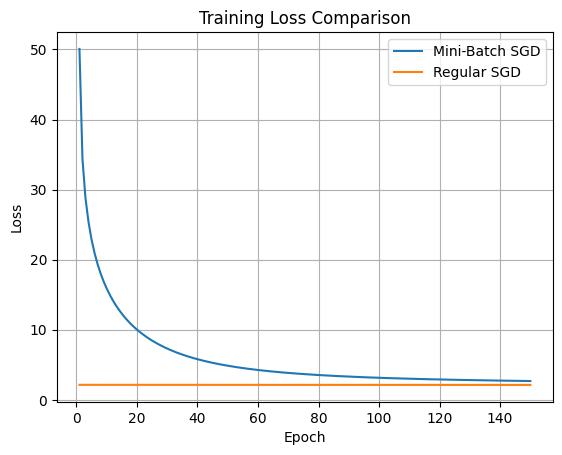

In [4]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 784  # MNIST images are 28x28 pixels
hidden_size = 100
output_size = 10
batch_size = 10
learning_rate = 1e-6
epochs = [25, 50, 100, 150]

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Model architecture
class FFNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize weights and biases manually
weights_input_hidden = torch.randn(input_size, hidden_size, device=device, requires_grad=False)
biases_input_hidden = torch.randn(hidden_size, device=device, requires_grad=False)
weights_hidden_output = torch.randn(hidden_size, output_size, device=device, requires_grad=False)
biases_hidden_output = torch.randn(output_size, device=device, requires_grad=False)

# Training without using optimizer (Mini-batch SGD)
def train_minibatch_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                        weights_hidden_output, biases_hidden_output, epochs):
    losses = []
    for epoch in range(max(epochs)):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            hidden_layer_input = torch.matmul(images, weights_input_hidden) + biases_input_hidden
            hidden_layer_output = torch.relu(hidden_layer_input)
            output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output
            loss = F.cross_entropy(output, labels)

            running_loss += loss.item()

            # Backward pass (manually compute gradients)
            grad_output = (output - torch.nn.functional.one_hot(labels, num_classes=output_size).float()).detach() / output.size(0)
            grad_hidden_output = torch.matmul(hidden_layer_output.T, grad_output)
            grad_hidden_input = torch.matmul(grad_output, weights_hidden_output.T)
            grad_hidden_input[hidden_layer_input <= 0] = 0  # ReLU derivative

            # Update weights and biases
            with torch.no_grad():
                weights_input_hidden -= learning_rate * torch.matmul(images.T, grad_hidden_input)
                biases_input_hidden -= learning_rate * grad_hidden_input.sum(dim=0)
                weights_hidden_output -= learning_rate * grad_hidden_output
                biases_hidden_output -= learning_rate * grad_output.sum(dim=0)

        epoch_loss = running_loss / len(train_loader)
        print(f'Mini-Batch SGD: Epoch [{epoch+1}/{max(epochs)}], Loss: {epoch_loss:.4f}')
        losses.append(epoch_loss)
    return losses

# Training with regular SGD
def train_regular_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                      weights_hidden_output, biases_hidden_output, epochs):
    losses = []
    images, labels = next(iter(train_loader))
    images = images.view(-1, 28*28).to(device)
    labels = labels.to(device)

    for epoch in range(max(epochs)):
        # Forward pass
        hidden_layer_input = torch.matmul(images, weights_input_hidden) + biases_input_hidden
        hidden_layer_output = torch.relu(hidden_layer_input)
        output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output
        loss = F.cross_entropy(output, labels)

        # Backward pass
        grad_output = (output - torch.nn.functional.one_hot(labels, num_classes=output_size).float()).detach() / output.size(0)
        grad_hidden_output = torch.matmul(hidden_layer_output.T, grad_output)
        grad_hidden_input = torch.matmul(grad_output, weights_hidden_output.T)
        grad_hidden_input[hidden_layer_input <= 0] = 0  # ReLU derivative

        # Update weights and biases
        with torch.no_grad():
            weights_input_hidden -= learning_rate * torch.matmul(images.T, grad_hidden_input)
            biases_input_hidden -= learning_rate * grad_hidden_input.sum(dim=0)
            weights_hidden_output -= learning_rate * grad_hidden_output
            biases_hidden_output -= learning_rate * grad_output.sum(dim=0)

        losses.append(loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Regular SGD: Epoch [{epoch+1}/{max(epochs)}], Loss: {loss.item():.4f}')
    return losses

# Train with mini-batch SGD
losses_minibatch_sgd = train_minibatch_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                                           weights_hidden_output, biases_hidden_output, epochs)

# Train with regular SGD
losses_regular_sgd = train_regular_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                                       weights_hidden_output, biases_hidden_output, epochs)

# Plotting the training loss
plt.plot(range(1, max(epochs)+1), losses_minibatch_sgd, label='Mini-Batch SGD')
plt.plot(range(1, max(epochs)+1), losses_regular_sgd, label='Regular SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

Mini-Batch SGD: Epoch [1/150], Loss: 103.3371
Mini-Batch SGD: Epoch [2/150], Loss: 98.0282
Mini-Batch SGD: Epoch [3/150], Loss: 93.3581
Mini-Batch SGD: Epoch [4/150], Loss: 89.2161
Mini-Batch SGD: Epoch [5/150], Loss: 85.5115
Mini-Batch SGD: Epoch [6/150], Loss: 82.1828
Mini-Batch SGD: Epoch [7/150], Loss: 79.1786
Mini-Batch SGD: Epoch [8/150], Loss: 76.4516
Mini-Batch SGD: Epoch [9/150], Loss: 73.9711
Mini-Batch SGD: Epoch [10/150], Loss: 71.7105
Mini-Batch SGD: Epoch [11/150], Loss: 69.6448
Mini-Batch SGD: Epoch [12/150], Loss: 67.7555
Mini-Batch SGD: Epoch [13/150], Loss: 66.0257
Mini-Batch SGD: Epoch [14/150], Loss: 64.4372
Mini-Batch SGD: Epoch [15/150], Loss: 62.9728
Mini-Batch SGD: Epoch [16/150], Loss: 61.6191
Mini-Batch SGD: Epoch [17/150], Loss: 60.3642
Mini-Batch SGD: Epoch [18/150], Loss: 59.1967
Mini-Batch SGD: Epoch [19/150], Loss: 58.1069
Mini-Batch SGD: Epoch [20/150], Loss: 57.0876
Mini-Batch SGD: Epoch [21/150], Loss: 56.1321
Mini-Batch SGD: Epoch [22/150], Loss: 55.2

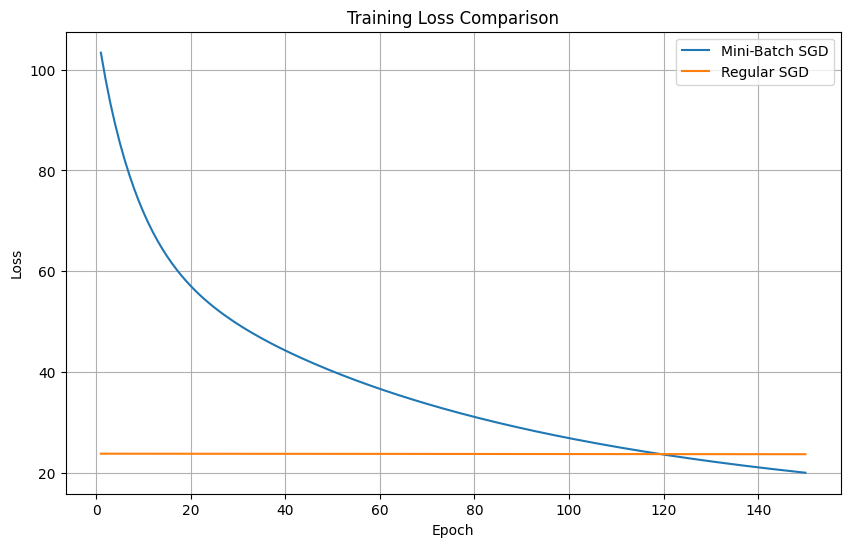

In [5]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 784  # MNIST images are 28x28 pixels
hidden_size = 100
output_size = 10
batch_size = 10
learning_rate = 1e-6
epochs = [25, 50, 100, 150]

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize weights and biases manually
weights_input_hidden = torch.randn(input_size, hidden_size, device=device, requires_grad=False)
biases_input_hidden = torch.randn(hidden_size, device=device, requires_grad=False)
weights_hidden_output = torch.randn(hidden_size, output_size, device=device, requires_grad=False)
biases_hidden_output = torch.randn(output_size, device=device, requires_grad=False)

# Training without using optimizer (Mini-batch SGD)
def train_minibatch_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                        weights_hidden_output, biases_hidden_output, epochs):
    losses = []
    for epoch in range(max(epochs)):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            hidden_layer_input = torch.matmul(images, weights_input_hidden) + biases_input_hidden
            hidden_layer_output = torch.relu(hidden_layer_input)
            output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output

            # Calculate loss
            one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=output_size).float()
            loss = -torch.sum(one_hot_labels * F.log_softmax(output, dim=1)) / batch_size

            running_loss += loss.item()

            # Backward pass (manually compute gradients)
            grad_output = (F.softmax(output, dim=1) - one_hot_labels) / batch_size
            grad_hidden_output = torch.matmul(hidden_layer_output.T, grad_output)
            grad_hidden_input = torch.matmul(grad_output, weights_hidden_output.T)
            grad_hidden_input[hidden_layer_input <= 0] = 0  # ReLU derivative

            # Update weights and biases
            with torch.no_grad():
                weights_input_hidden -= learning_rate * torch.matmul(images.T, grad_hidden_input)
                biases_input_hidden -= learning_rate * grad_hidden_input.sum(dim=0)
                weights_hidden_output -= learning_rate * grad_hidden_output
                biases_hidden_output -= learning_rate * grad_output.sum(dim=0)

        epoch_loss = running_loss / len(train_loader)
        print(f'Mini-Batch SGD: Epoch [{epoch+1}/{max(epochs)}], Loss: {epoch_loss:.4f}')
        losses.append(epoch_loss)
    return losses

# Training with regular SGD
def train_regular_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                      weights_hidden_output, biases_hidden_output, epochs):
    losses = []
    images, labels = next(iter(train_loader))
    images = images.view(-1, 28*28).to(device)
    labels = labels.to(device)

    for epoch in range(max(epochs)):
        # Forward pass
        hidden_layer_input = torch.matmul(images, weights_input_hidden) + biases_input_hidden
        hidden_layer_output = torch.relu(hidden_layer_input)
        output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output

        # Calculate loss
        one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=output_size).float()
        loss = -torch.sum(one_hot_labels * F.log_softmax(output, dim=1)) / batch_size

        losses.append(loss.item())

        # Backward pass
        grad_output = (F.softmax(output, dim=1) - one_hot_labels) / batch_size
        grad_hidden_output = torch.matmul(hidden_layer_output.T, grad_output)
        grad_hidden_input = torch.matmul(grad_output, weights_hidden_output.T)
        grad_hidden_input[hidden_layer_input <= 0] = 0  # ReLU derivative

        # Update weights and biases
        with torch.no_grad():
            weights_input_hidden -= learning_rate * torch.matmul(images.T, grad_hidden_input)
            biases_input_hidden -= learning_rate * grad_hidden_input.sum(dim=0)
            weights_hidden_output -= learning_rate * grad_hidden_output
            biases_hidden_output -= learning_rate * grad_output.sum(dim=0)

        if (epoch+1) % 10 == 0:
            print(f'Regular SGD: Epoch [{epoch+1}/{max(epochs)}], Loss: {loss.item():.4f}')
    return losses

# Train with mini-batch SGD
losses_minibatch_sgd = train_minibatch_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                                           weights_hidden_output, biases_hidden_output, epochs)

# Train with regular SGD
losses_regular_sgd = train_regular_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                                       weights_hidden_output, biases_hidden_output, epochs)

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, max(epochs)+1), losses_minibatch_sgd, label='Mini-Batch SGD')
plt.plot(range(1, max(epochs)+1), losses_regular_sgd, label='Regular SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 784  # MNIST images are 28x28 pixels
output_size = 10
learning_rate = 1e-6
epochs = [25, 50, 100, 150]
hidden_sizes = [25, 50, 100, 150]

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True)

# Initialize weights and biases manually
def initialize_parameters(input_size, hidden_size, output_size):
    weights_input_hidden = torch.randn(input_size, hidden_size, device=device, requires_grad=False)
    biases_input_hidden = torch.randn(hidden_size, device=device, requires_grad=False)
    weights_hidden_output = torch.randn(hidden_size, output_size, device=device, requires_grad=False)
    biases_hidden_output = torch.randn(output_size, device=device, requires_grad=False)
    return weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output

# Function to calculate forward pass
def forward_pass(inputs, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
    hidden_layer_input = torch.matmul(inputs, weights_input_hidden) + biases_input_hidden
    hidden_layer_output = torch.relu(hidden_layer_input)
    output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output
    return output

# Function to calculate cross-entropy loss
def cross_entropy_loss(outputs, labels):
    loss = F.cross_entropy(outputs, labels)
    return loss

# Function to calculate accuracy
def accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    acc = correct / total
    return acc

# Function to train the model with regular SGD
def train_regular_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                      weights_hidden_output, biases_hidden_output, epochs, hidden_size):
    accuracies = []
    for epoch in epochs:
        for _ in range(epoch):
            total_loss = 0
            total_correct = 0
            total_samples = 0
            for images, labels in train_loader:
                images = images.view(-1, 28*28).to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = forward_pass(images, weights_input_hidden, biases_input_hidden,
                                       weights_hidden_output, biases_hidden_output)

                # Calculate loss
                loss = cross_entropy_loss(outputs, labels)

                # Backward pass
                # Gradients of loss w.r.t. output layer weights and biases
                grad_loss_output = (F.softmax(outputs, dim=1) - F.one_hot(labels, 10).float()) / len(train_loader.dataset)
                grad_weights_hidden_output = torch.matmul(torch.transpose(torch.relu(torch.matmul(images, weights_input_hidden) + biases_input_hidden), 0, 1), grad_loss_output)
                grad_biases_hidden_output = grad_loss_output.sum(dim=0)

                # Gradients of loss w.r.t. hidden layer weights and biases
                grad_loss_hidden = torch.matmul(grad_loss_output, torch.transpose(weights_hidden_output, 0, 1))
                grad_loss_hidden[torch.matmul(images, weights_input_hidden) + biases_input_hidden <= 0] = 0  # ReLU derivative
                grad_weights_input_hidden = torch.matmul(torch.transpose(images, 0, 1), grad_loss_hidden)
                grad_biases_input_hidden = grad_loss_hidden.sum(dim=0)

                # Update weights and biases
                with torch.no_grad():
                    weights_input_hidden -= learning_rate * grad_weights_input_hidden
                    biases_input_hidden -= learning_rate * grad_biases_input_hidden
                    weights_hidden_output -= learning_rate * grad_weights_hidden_output
                    biases_hidden_output -= learning_rate * grad_biases_hidden_output

                # Calculate accuracy
                total_correct += (torch.argmax(outputs, dim=1) == labels).sum().item()
                total_samples += labels.size(0)

                # Calculate total loss
                total_loss += loss.item()

            # Calculate accuracy for the epoch
            epoch_acc = total_correct / total_samples
            accuracies.append(epoch_acc)

            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss}, Accuracy: {epoch_acc:.4f}')
           # print(f'Epoch [{epoch+1}/{max(epochs)}], Loss: {total_loss}, Accuracy: {epoch_acc:.4f}')
    return accuracies


# Train with regular SGD for different hidden sizes and epochs
accuracies_regular_sgd = []
for hidden_size in hidden_sizes:
    weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output = initialize_parameters(input_size, hidden_size, output_size)
    print(f"Training with hidden size: {hidden_size}")
    accuracies_regular_sgd.append(train_regular_sgd(train_loader, weights_input_hidden, biases_input_hidden,
                                                    weights_hidden_output, biases_hidden_output, epochs, hidden_size))

# Plotting the accuracy against the number of neurons
plt.figure(figsize=(10, 6))
for i, hidden_size in enumerate(hidden_sizes):
    plt.plot(epochs, accuracies_regular_sgd[i], label=f'Hidden Size: {hidden_size}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Network Accuracy for Different Hidden Sizes (Regular SGD)')
plt.legend()
plt.grid(True)
plt.show()


Training with hidden size: 25
Epoch [26/[25, 50, 100, 150]], Loss: 3001071.1190605555, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001071.0981660276, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001071.0779549507, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001071.056386592, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001071.036172727, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001071.015068016, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001070.9952365444, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001070.974395568, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001070.9540962004, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001070.933823121, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001070.913491286, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001070.8928159787, Accuracy: 0.0983
Epoch [26/[25, 50, 100, 150]], Loss: 3001070.872578894, Accuracy: 0.0983
Epoch [26/[25, 

KeyboardInterrupt: 